# Waldemar Chang - Assignment 6: Integrating the Extraction and Retrieval Service
## EN.705.603.82.FA24 Creating AI-Enabled Systems
### Task 3: Analyze the pre-trained models (i.e., "vggface2" and "casia-webface")
#### In a notebook called notebooks/embedding_analysis.ipynb, analyze the performance of the two models 'casia-webface' or 'vggface2'.

In [1]:
from pipeline import Pipeline

# Initialize the pipeline for both models (vggface2 and casia-webface)
casia_pipeline = Pipeline(pretrained='casia-webface', device='cpu')
vggface2_pipeline = Pipeline(pretrained='vggface2', device='cpu')

In [2]:
from PIL import Image
import os

# Set up probe directory path
probe_dir = "simclr_resources/probe"

# Load probe images and labels from the directory
test_images = []
test_labels = []

# Update the label extraction to use the parent directory (identity name)
for root, _, files in os.walk(probe_dir):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')) and not file.startswith('._'):
            image_path = os.path.join(root, file)
            test_images.append(Image.open(image_path))
            identity_name = os.path.basename(os.path.dirname(image_path))  # Use the directory name as the label
            test_labels.append(identity_name)

In [3]:
# Extract embeddings for casia-webface model
casia_embeddings = [casia_pipeline._encode(image) for image in test_images]

# Extract embeddings for vggface2 model
vgg_embeddings = [vggface2_pipeline._encode(image) for image in test_images]

In [9]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Initialize list to store inter-class similarities
inter_similarities_casia = []
inter_similarities_vgg = []

# Compute inter-class similarities for Casia model
for i in range(len(casia_embeddings)):
    for j in range(i + 1, len(casia_embeddings)):
        sim = cosine_similarity([casia_embeddings[i]], [casia_embeddings[j]])[0][0]
        inter_similarities_casia.append(sim)

# Compute inter-class similarities for VGG model
for i in range(len(vgg_embeddings)):
    for j in range(i + 1, len(vgg_embeddings)):
        sim = cosine_similarity([vgg_embeddings[i]], [vgg_embeddings[j]])[0][0]
        inter_similarities_vgg.append(sim)

In [11]:
from torchvision import transforms
import torch

# Define the noise levels to test
noise_levels = [0.05, 0.1, 0.2]

# Dictionaries to store similarities
noise_similarities_casia = {}
noise_similarities_vgg = {}

for noise_level in noise_levels:
    print(f"\nApplying Gaussian noise with standard deviation: {noise_level}")
    noise_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Lambda(lambda x: x + noise_level * torch.randn_like(x)),
        transforms.ToPILImage()
    ])
    noisy_images = [noise_transform(image) for image in test_images]
    
    # Generate embeddings for noisy images (Casia)
    noisy_casia_embeddings = [casia_pipeline._encode(image) for image in noisy_images]
    
    # Compare original and noisy embeddings (Casia)
    casia_similarities = []
    for i in range(len(casia_embeddings)):
        sim = cosine_similarity([casia_embeddings[i]], [noisy_casia_embeddings[i]])[0][0]
        casia_similarities.append(sim)
    noise_similarities_casia[noise_level] = casia_similarities
    
    # Generate embeddings for noisy images (VGG)
    noisy_vgg_embeddings = [vggface2_pipeline._encode(image) for image in noisy_images]
    
    # Compare original and noisy embeddings (VGG)
    vgg_similarities = []
    for i in range(len(vgg_embeddings)):
        sim = cosine_similarity([vgg_embeddings[i]], [noisy_vgg_embeddings[i]])[0][0]
        vgg_similarities.append(sim)
    noise_similarities_vgg[noise_level] = vgg_similarities


Applying Gaussian noise with standard deviation: 0.05

Applying Gaussian noise with standard deviation: 0.1

Applying Gaussian noise with standard deviation: 0.2


In [12]:
# Define the kernel sizes to test
blur_kernel_sizes = [3, 5, 7]

# Dictionaries to store similarities
blur_similarities_casia = {}
blur_similarities_vgg = {}

for kernel_size in blur_kernel_sizes:
    print(f"\nApplying Gaussian blur with kernel size: {kernel_size}")
    blur_transform = transforms.GaussianBlur(kernel_size=kernel_size)
    blurred_images = [blur_transform(image) for image in test_images]
    
    # Generate embeddings for blurred images (Casia)
    blurred_casia_embeddings = [casia_pipeline._encode(image) for image in blurred_images]
    
    # Compare original and blurred embeddings (Casia)
    casia_similarities = []
    for i in range(len(casia_embeddings)):
        sim = cosine_similarity([casia_embeddings[i]], [blurred_casia_embeddings[i]])[0][0]
        casia_similarities.append(sim)
    blur_similarities_casia[kernel_size] = casia_similarities
    
    # Generate embeddings for blurred images (VGG)
    blurred_vgg_embeddings = [vggface2_pipeline._encode(image) for image in blurred_images]
    
    # Compare original and blurred embeddings (VGG)
    vgg_similarities = []
    for i in range(len(vgg_embeddings)):
        sim = cosine_similarity([vgg_embeddings[i]], [blurred_vgg_embeddings[i]])[0][0]
        vgg_similarities.append(sim)
    blur_similarities_vgg[kernel_size] = vgg_similarities


Applying Gaussian blur with kernel size: 3

Applying Gaussian blur with kernel size: 5

Applying Gaussian blur with kernel size: 7


In [13]:
# Define the brightness factors to test
brightness_factors = [0.5, 1.0, 1.5]

# Dictionaries to store similarities
brightness_similarities_casia = {}
brightness_similarities_vgg = {}

for factor in brightness_factors:
    print(f"\nApplying brightness adjustment with factor: {factor}")
    brightness_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Lambda(lambda x: x * factor),
        transforms.ToPILImage()
    ])
    bright_images = [brightness_transform(image) for image in test_images]
    
    # Generate embeddings for brightened images (Casia)
    bright_casia_embeddings = [casia_pipeline._encode(image) for image in bright_images]
    
    # Compare original and brightened embeddings (Casia)
    casia_similarities = []
    for i in range(len(casia_embeddings)):
        sim = cosine_similarity([casia_embeddings[i]], [bright_casia_embeddings[i]])[0][0]
        casia_similarities.append(sim)
    brightness_similarities_casia[factor] = casia_similarities
    
    # Generate embeddings for brightened images (VGG)
    bright_vgg_embeddings = [vggface2_pipeline._encode(image) for image in bright_images]
    
    # Compare original and brightened embeddings (VGG)
    vgg_similarities = []
    for i in range(len(vgg_embeddings)):
        sim = cosine_similarity([vgg_embeddings[i]], [bright_vgg_embeddings[i]])[0][0]
        vgg_similarities.append(sim)
    brightness_similarities_vgg[factor] = vgg_similarities


Applying brightness adjustment with factor: 0.5

Applying brightness adjustment with factor: 1.0

Applying brightness adjustment with factor: 1.5


# Analysis

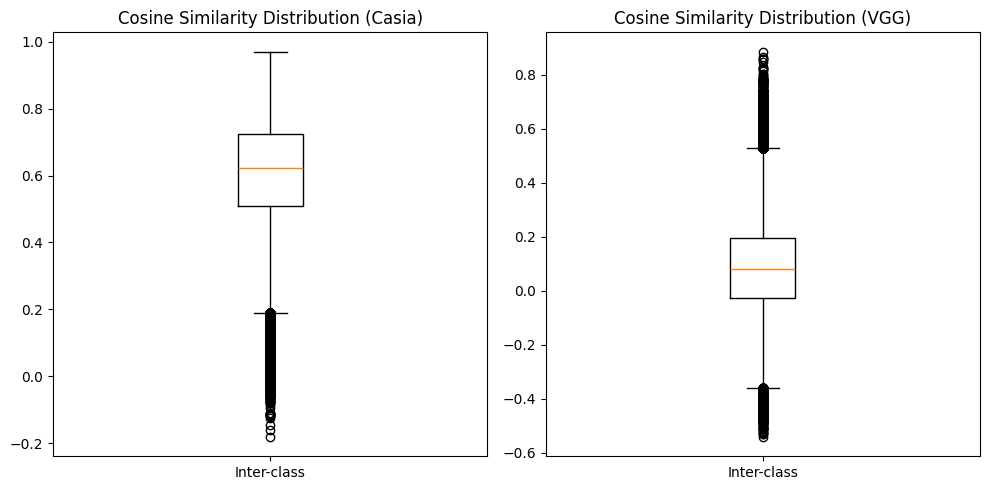

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Casia boxplot
plt.subplot(1, 2, 1)
plt.boxplot([inter_similarities_casia], labels=['Inter-class'])
plt.title('Cosine Similarity Distribution (Casia)')

# VGG boxplot
plt.subplot(1, 2, 2)
plt.boxplot([inter_similarities_vgg], labels=['Inter-class'])
plt.title('Cosine Similarity Distribution (VGG)')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

### General Model Performance

The general prediction model performance for both Casia and VGGFace2 models is shown through the cosine similarity distributions of inter-class embeddings. A boxplot is used to visualize these distributions, which provides important insights into the performance of the models by showing the spread and central tendency of the similarity scores between different identities.

A boxplot represents data through several key summary statistics: the minimum, first quartile (Q1), median (Q2), third quartile (Q3), and maximum. The box represents the interquartile range (IQR) between Q1 and Q3, with the line inside the box showing the median (Q2). The whiskers extend to the minimum and maximum values, excluding outliers, which are represented as individual points outside the whiskers. By analyzing the boxplots for both models, we can infer their ability to distinguish between different identities.

For the Casia model, the median cosine similarity score is around 0.6. This indicates that on average, embeddings of different identities are somewhat similar. A higher median similarity implies that the different identities are not as well separated, suggesting less effective discrimination between individuals. Additionally, the spread of the similarity values for Casia is relatively narrow, indicating consistent but less distinctive embeddings across different identities. The outliers near 0 indicate a few cases where the model achieved better separation, but these instances are less common.

In contrast, the VGG model has a median cosine similarity score close to 0, which implies that embeddings of different identities are much less similar. This lower median indicates better separation between different identities, which is desirable for face recognition. The spread of the similarity values for VGG is wider, meaning that the model generates a broader range of similarity scores for different identities, reflecting its ability to create more unique features for each person. The outliers in the VGG plot show a larger number of negative similarity values, which suggests that the model frequently produces distinct embeddings, thereby better distinguishing between different individuals.

In summary, the Casia model exhibits a higher median inter-class similarity around 0.6, indicating less separation between different identities, and has a narrower spread, implying less distinctive embeddings. On the other hand, the VGG model shows a median inter-class similarity close to 0, with a wider spread and more negative similarity values, suggesting that it is more effective in distinguishing between different identities.

These insights into the cosine similarity distributions help us understand that the VGG model is generally better at creating distinctive embeddings for different identities, which is crucial for accurate face recognition. The Casia model might require additional improvements or preprocessing to enhance its distinctiveness, while VGG demonstrates greater robustness in separating identities.

### Impact of Noise Transformations

The robustness of both models to different types of noise transformations is evaluated by analyzing the change in cosine similarity scores under different noise levels. Below are the observations for Gaussian noise, Gaussian blur, and brightness adjustments.

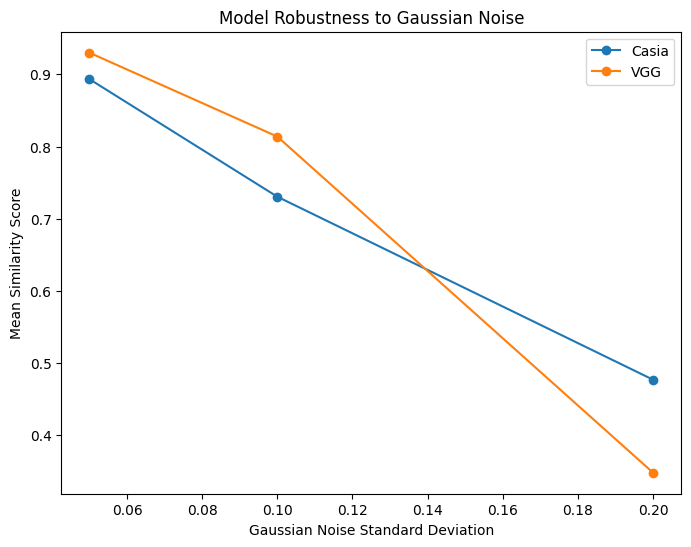

In [14]:
# Plotting the impact of Gaussian noise on similarity scores

# Prepare data for plotting
noise_levels_list = list(noise_similarities_casia.keys())
casia_means = [np.mean(noise_similarities_casia[nl]) for nl in noise_levels_list]
vgg_means = [np.mean(noise_similarities_vgg[nl]) for nl in noise_levels_list]

# Plot
plt.figure(figsize=(8, 6))
plt.plot(noise_levels_list, casia_means, label='Casia', marker='o')
plt.plot(noise_levels_list, vgg_means, label='VGG', marker='o')
plt.xlabel('Gaussian Noise Standard Deviation')
plt.ylabel('Mean Similarity Score')
plt.title('Model Robustness to Gaussian Noise')
plt.legend()
plt.show()

#### 1. **Gaussian Noise**

The similarity scores between the original images and those with Gaussian noise are plotted above. It can be observed that:

- **VGG**: Initially, VGG has a higher similarity score compared to Casia. However, as the noise level increases, the performance of the VGG model deteriorates more sharply, indicating a higher sensitivity to Gaussian noise.
- **Casia**: Although Casia starts with a slightly lower similarity score, it maintains a more gradual decline in performance, showing more robustness to increasing levels of Gaussian noise compared to VGG.

**System Design Impact**: Given the sensitivity of the VGG model to Gaussian noise, a system designed with VGG might require noise reduction preprocessing steps to ensure consistent performance. Casia, being more resilient, might be better suited for environments where noise is a concern.

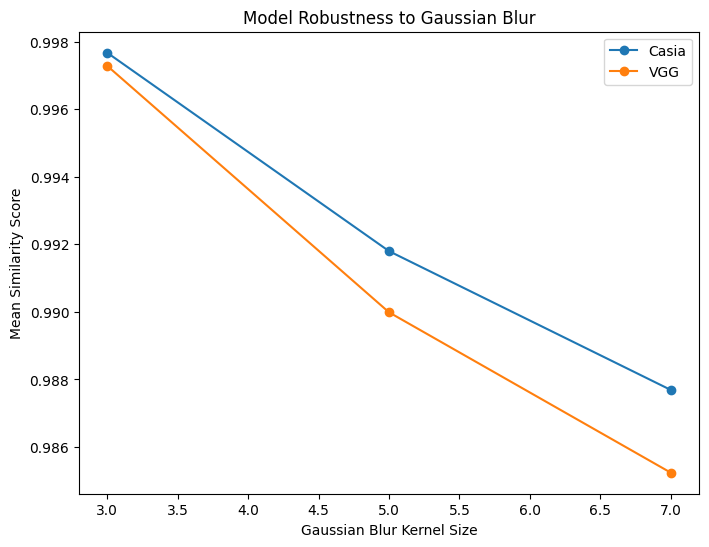

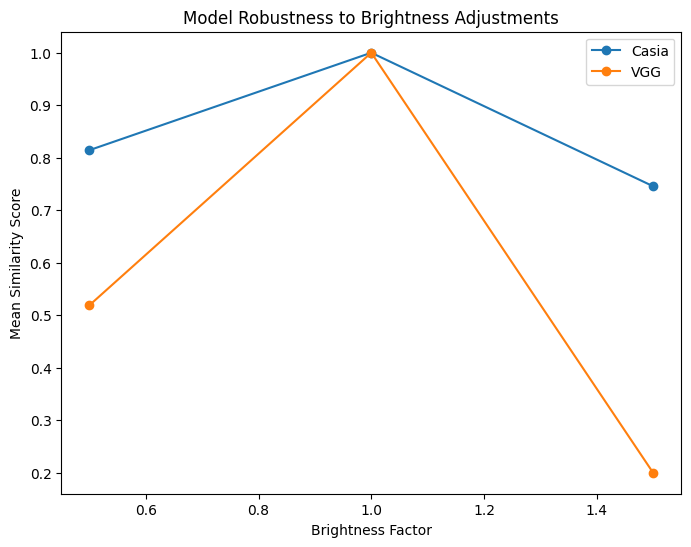

In [15]:
# For Gaussian Blur
kernel_sizes = list(blur_similarities_casia.keys())
casia_means_blur = [np.mean(blur_similarities_casia[ks]) for ks in kernel_sizes]
vgg_means_blur = [np.mean(blur_similarities_vgg[ks]) for ks in kernel_sizes]

plt.figure(figsize=(8, 6))
plt.plot(kernel_sizes, casia_means_blur, label='Casia', marker='o')
plt.plot(kernel_sizes, vgg_means_blur, label='VGG', marker='o')
plt.xlabel('Gaussian Blur Kernel Size')
plt.ylabel('Mean Similarity Score')
plt.title('Model Robustness to Gaussian Blur')
plt.legend()
plt.show()

# For Brightness Adjustments
brightness_levels = list(brightness_similarities_casia.keys())
casia_means_brightness = [np.mean(brightness_similarities_casia[bf]) for bf in brightness_levels]
vgg_means_brightness = [np.mean(brightness_similarities_vgg[bf]) for bf in brightness_levels]

plt.figure(figsize=(8, 6))
plt.plot(brightness_levels, casia_means_brightness, label='Casia', marker='o')
plt.plot(brightness_levels, vgg_means_brightness, label='VGG', marker='o')
plt.xlabel('Brightness Factor')
plt.ylabel('Mean Similarity Score')
plt.title('Model Robustness to Brightness Adjustments')
plt.legend()
plt.show()

#### 2. **Gaussian Blur**

The impact of Gaussian blur is shown above. Both models show a decline in similarity scores as the blur kernel size increases, indicating a reduction in performance under blurring.

- **VGG**: The similarity score decreases faster for the VGG model as the blur kernel size increases, showing that VGG is more sensitive to image blurriness.
- **Casia**: The decline is less steep, implying that Casia is relatively more robust to blur, although the performance still degrades with increasing blur severity.

**System Design Impact**: In scenarios where images may be out of focus, the Casia model might be a more reliable choice due to its robustness to blur. Alternatively, using deblurring techniques can improve VGG performance.

#### 3. **Brightness Adjustments**

The figure above shows the models' performance under brightness adjustments. The similarity scores for both models peak when the brightness factor is close to the original (1.0).

- **VGG**: Exhibits a dramatic drop in performance when the brightness is altered, indicating a high sensitivity to changes in brightness.
- **Casia**: The Casia model also shows a decline, but the drop is more controlled, especially when the brightness is increased. This indicates that Casia is better at handling changes in illumination.

**System Design Impact**: For environments with highly variable lighting, such as outdoor settings, the Casia model would perform more consistently. Alternatively, brightness normalization techniques could be employed to improve VGG's performance in such conditions.

## Overall System Design Impact
The deployment of a face recognition system for IronClad’s employee access control across its numerous facilities poses specific challenges that necessitate careful consideration of model selection, preprocessing techniques, and system design. The performance analysis of both the Casia and VGGFace2 models under various conditions reveals essential insights into their strengths and weaknesses, which directly influence the design choices for this access control system. Differentiating between employees is of utmost importance, and ensuring accuracy in diverse environments, where image quality may vary, requires a robust and reliable system.

### Threshold Tuning for Decision-Making
Given the differences in model performance, one critical design consideration is the decision threshold, the point at which two images are classified as belonging to the same person. With the VGG model producing more distinct embeddings (i.e., lower inter-class similarity scores), the threshold for classifying a match should be set higher, reducing the likelihood of false positives. This would ensure that only highly similar embeddings are classified as the same person, making VGG more reliable for high-accuracy face recognition. However, this stricter threshold might require tighter control over the quality of input images to ensure consistent accuracy.

On the other hand, Casia, with its higher inter-class similarity, requires a lower threshold for classifying a match. Since embeddings from different people are often more similar in the Casia model, a lower threshold ensures that the system doesn't miss true matches, but it increases the risk of false positives, especially in noisy environments. Therefore, careful threshold tuning and potentially multi-step verification would be essential to balance accuracy and security for both models in IronClad's access control system.

### Preprocessing and Noise Handling
The analysis of both models' robustness to Gaussian noise, Gaussian blur, and brightness adjustments provides valuable insights for IronClad’s system design, particularly in environments where image quality might degrade due to lighting conditions, camera quality, or environmental factors.

#### Gaussian Noise
The results show that while VGG starts with a higher similarity score, its performance deteriorates more sharply as Gaussian noise is introduced. This indicates a higher sensitivity to noise, making it less reliable in environments where the image quality might suffer due to random noise, such as outdoor cameras exposed to changing weather conditions. Casia, on the other hand, exhibits a more gradual decline, demonstrating greater resilience to noise. For IronClad, where employee access control must function effectively in various conditions, Casia’s greater noise robustness makes it a more attractive candidate for deployment in noisy or uncontrolled environments. However, if VGG is chosen for its superior inter-class separation, noise reduction techniques would need to be integrated into the system’s preprocessing pipeline to mitigate this sensitivity and ensure stable performance.

#### Gaussian Blur
Similarly, VGG is more sensitive to image blurriness caused by Gaussian blur, with a faster decline in similarity scores as blur severity increases. Casia, while still affected, is less sensitive to blurring and maintains better performance as blur levels increase. In environments where cameras might capture blurry images, such as employees quickly passing through checkpoints or areas with variable focus, Casia would offer more consistent results. Alternatively, deblurring algorithms could be applied to improve VGG’s performance, ensuring that the model continues to function effectively even when images are not perfectly focused.

#### Brightness Adjustments
Brightness adjustments further highlight differences between the two models. VGG shows a steep drop in performance when brightness deviates from the optimal level, indicating a high sensitivity to changes in lighting. In contrast, Casia shows a more controlled decline, especially when brightness is increased, demonstrating better adaptability to different lighting conditions. For IronClad, where lighting conditions in various facilities may differ significantly, such as outdoor locations with varying natural light or dimly lit indoor areas, Casia’s robustness to brightness variations would provide a more stable performance. However, if VGG is preferred for its superior identity separation, implementing brightness normalization techniques in the preprocessing step would be essential to counteract its sensitivity to illumination changes.

### Scalability and System Robustness
Scalability is a key factor for IronClad, which operates numerous facilities and has a large employee base. As the number of individuals in the system increases, the ability to accurately differentiate between them becomes even more critical. VGG’s better inter-class separation suggests that it would scale more effectively, maintaining high accuracy even as the number of employees in the system grows. Casia, while more robust to noise and environmental factors, may struggle with scalability due to its higher inter-class similarity, which could lead to overlapping embeddings and more frequent false positives as the system expands.

However, Casia’s greater noise robustness makes it more suited to deployments in environments where image quality is unpredictable or where employees are moving quickly through checkpoints. For larger-scale deployments where noise and scalability are both concerns, a hybrid approach could be considered, using VGG for most environments and Casia for areas prone to noise or blurriness. Alternatively, if VGG is selected for the entire system, robust preprocessing pipelines, including noise reduction, deblurring, and brightness normalization, would be necessary to maintain its performance as the system scales.

### Conclusions and Recommendations
In conclusion, the results of this analysis provide clear guidance for the design of IronClad’s employee access control system. The Casia model, with its greater robustness to noise, blur, and brightness changes, is a strong candidate for deployment in environments where image quality cannot always be controlled, such as outdoor facilities or areas with variable lighting. Its ability to maintain more consistent performance under these conditions makes it a reliable choice, especially in facilities where high variability in image quality is expected.

On the other hand, the VGG model’s superior ability to differentiate between identities makes it the better choice for environments where high accuracy is the top priority, such as secure indoor facilities where image quality can be better controlled. However, to ensure its stable performance, VGG would require additional preprocessing steps, including noise reduction, deblurring, and brightness normalization, to mitigate its sensitivity to environmental factors.

For IronClad, where the system must balance the need for accuracy and robustness across a wide variety of facilities and conditions, Casia’s noise resilience and VGG’s inter-class separation both offer unique advantages. The final system design might benefit from leveraging Casia’s robustness in challenging environments and using VGG in more controlled settings. If VGG is preferred for its scalability and identity separation, careful preprocessing and system threshold tuning will be essential to maintain its performance in real-world conditions.